In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
cd '../content/gdrive/MyDrive/544/data'

/content/gdrive/.shortcut-targets-by-id/1tv1NgC39M6TkzqyUxaSefd7wkaFtmWBK/544/data


In [4]:
pwd

'/content/gdrive/.shortcut-targets-by-id/1tv1NgC39M6TkzqyUxaSefd7wkaFtmWBK/544/data'

In [5]:
data = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1",names=["target", "ids", "date", "flag", "user", "text"])

In [6]:
data.head(4)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
len(data)

1600000

In [9]:
data.user.unique().shape

(659775,)

In [10]:
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  
pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
print(data.user.value_counts()[:50])

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
nuttychris         211
TraceyHewins       211
thisgoeshere       207
Spidersamm         205
StDAY              202
felicityfuller     195
Dogbook            192
_magic8ball        189
Djalfy             182
torilovesbradie    182
Dutchrudder        182
Quimo              180
twebbstack         180
Broooooke_         179
enamoredsoul       179
JessMcFlyxxx       178
MTVnHollyWEST23    178
MiDesfileNegro     177
linnetwoods        171
KevinEdwardsJr     171
insearchofnkotb    170
Scyranth           166
karinb_za          166
JBnVFCLover786     163
cookiemonster82    160
shellrawlins       159
maynaseric         159
hollyalyxfi

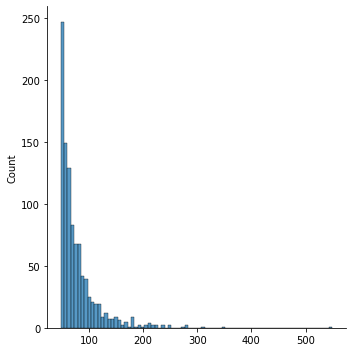

In [11]:
sns.displot(data.user.value_counts().values[:1000])

In [12]:
(data.user.value_counts().values>150).mean()

7.881474745178281e-05

In [13]:
(data.user.value_counts().values>150).shape

(659775,)

In [14]:
659775*7.881474745178281e-05

52.0

In [15]:
data.flag.value_counts()

NO_QUERY    1600000
Name: flag, dtype: int64

In [16]:
data["n_words"] = data.text.apply(lambda x: len([a for a in x.split(' ') if len(a) > 2]))

In [17]:
import matplotlib.pyplot as plt
user_sample = np.random.choice(data.user.unique(), 25)

In [18]:
user_info = data.groupby("user").apply(lambda x: len(x))

In [19]:
data_sample = data.loc[data.user.isin(user_sample)]

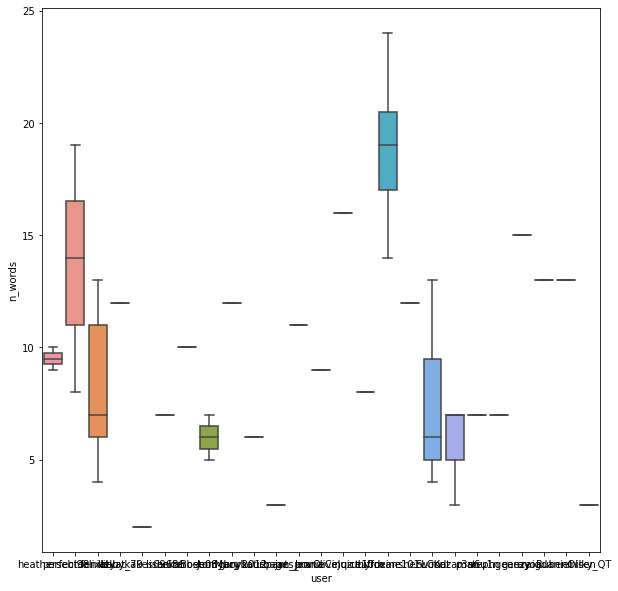

In [20]:
# Number of tweets variation per user
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_sample, x='user', y='n_words')

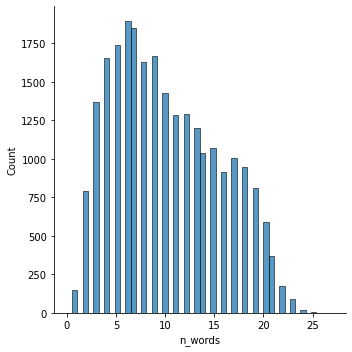

In [21]:
sns.displot(data.n_words.sample(25000))

In [22]:
data.groupby("user")["n_words"]